In [93]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scipy.optimize as opt
import statsmodels.api as sm

NormaltestResult(statistic=0.5997860677501821, pvalue=0.7408974673743264)
0.9741243124008179
0.6569511890411377


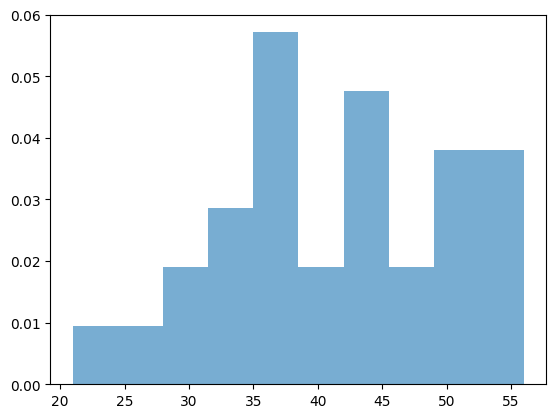

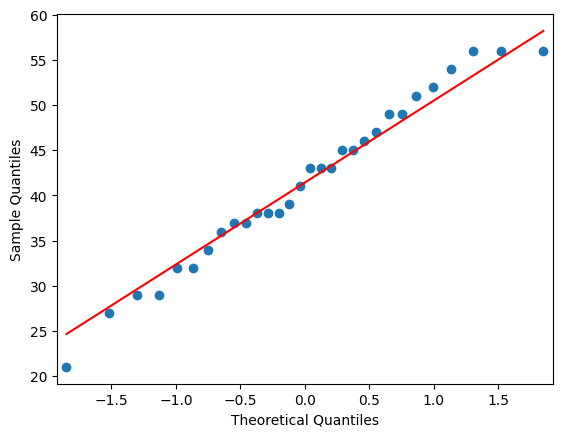

In [90]:
def nice_grid(plot):
    plot.rc("axes", axisbelow=True)
    plot.grid(True, which="major", color="#DDD")
    plot.grid(True, which="minor", color="#EEE", linewidth=0.5)
    plot.minorticks_on()


sample_data = np.array(
    [
        34,
        54,
        46,
        21,
        56,
        43,
        39,
        43,
        29,
        56,
        38,
        41,
        45,
        47,
        37,
        52,
        51,
        49,
        32,
        36,
        27,
        43,
        29,
        56,
        37,
        38,
        32,
        49,
        45,
        38,
    ]
)

sample_mean = np.mean(sample_data)
sample_median = np.median(sample_data)
sample_mode = stats.mode(sample_data)

df = pd.DataFrame(
    {"mean": [sample_mean], "median": [sample_median], "mode": [sample_mode[0]]}
)

df
plt.hist(sample_data, density=True, alpha=0.6)
x = np.linspace(10, 70)
# plt.plot(x, stats.norm.pdf(x, mu, std))

mu, std = stats.norm.fit(sample_data)
sm.qqplot(sample_data, line="s")

statistic, p_value_shapiro = stats.shapiro((sample_data))
dag = stats.normaltest(sample_data)
print(dag)

print(statistic)
print(p_value_shapiro)

Original skewness: 0.07170966546754795
Transformed skewness: -0.0011579526748409087


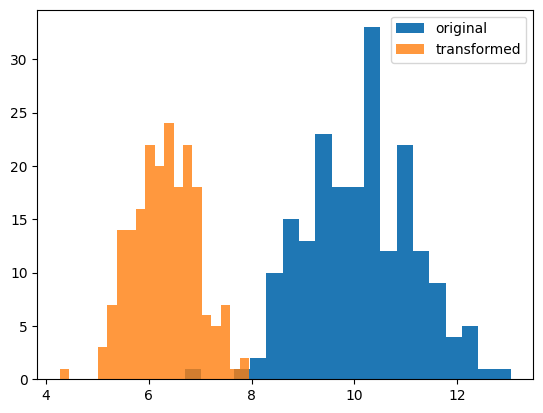

In [ ]:
vals = np.random.normal(10, 1, 200)

skew = stats.skew(vals)
_, l = stats.boxcox(vals)

transformed_data = stats.boxcox(vals, lmbda=l)

print("Original skewness:", skew)
print("Transformed skewness:", stats.skew(transformed_data))

plt.hist(vals, bins=20, label="original")
# plt.figure()
plt.hist(transformed_data, bins=20, alpha=0.8, label="transformed")
plt.legend()

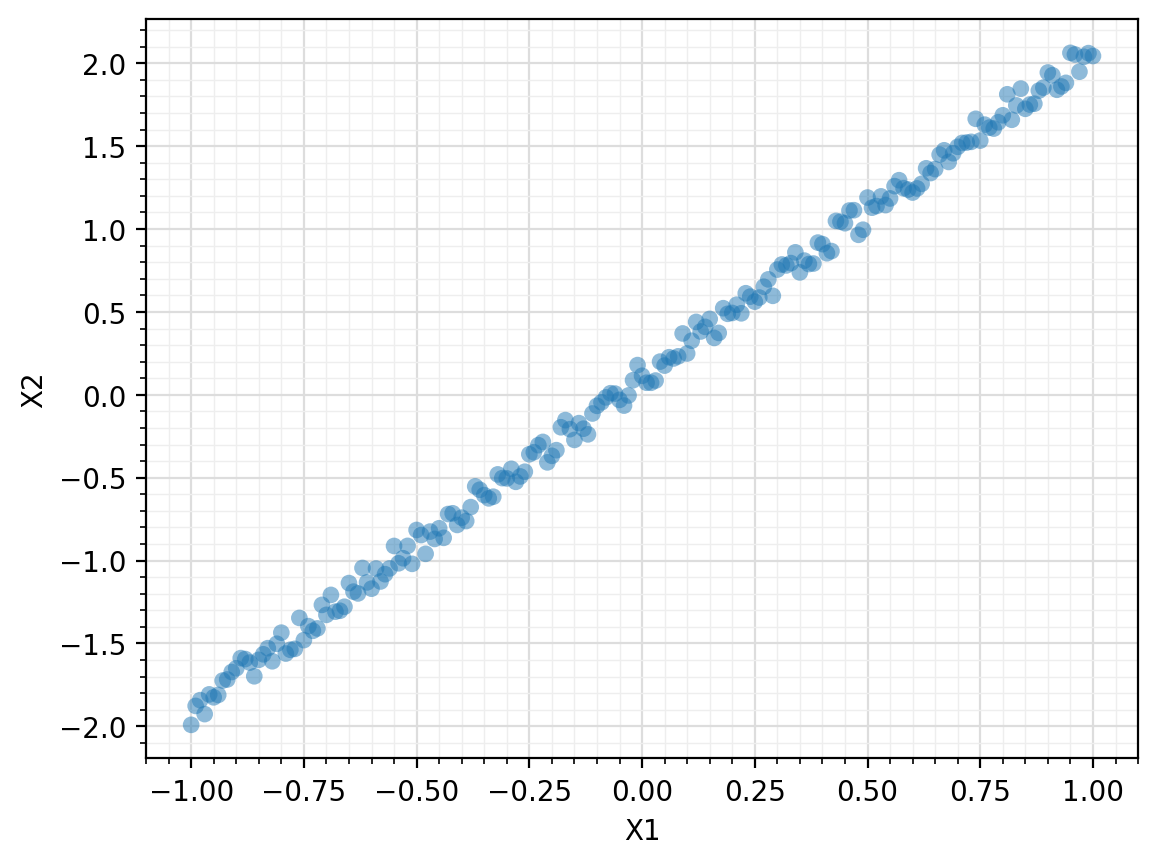

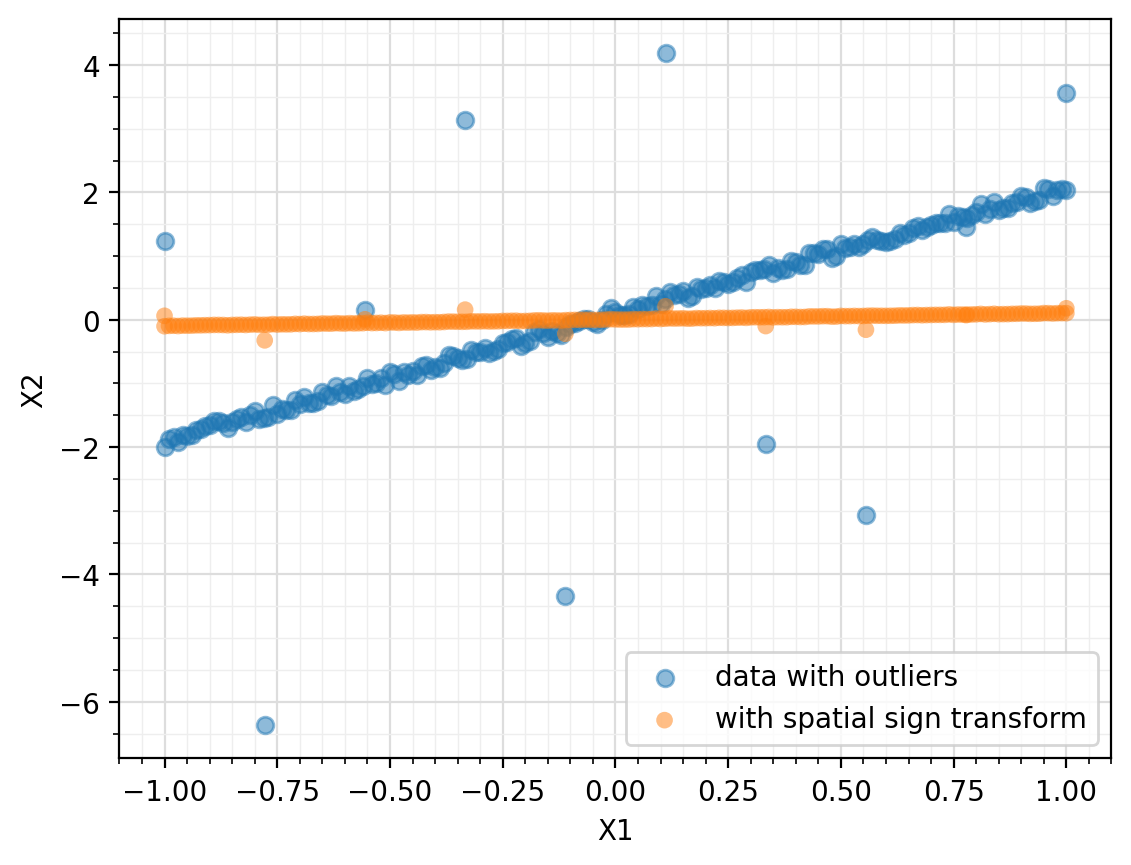

In [129]:
x1 = np.linspace(-1, 1, 201)
x2 = [i * 2 + np.random.rand() * 0.2 for i in x1]

arr = np.array([x1, x2])

plt.scatter(x1, x2, alpha=0.5, edgecolors="none")

x1_aug = [*x1, *np.linspace(-1, 1, 10)]
x2_aug = [*x2, *[i * 2 + np.random.rand() * 10 - 5 for i in np.linspace(-1, 1, 10)]]
with_outliers = np.array([x1_aug, x2_aug])


def spatial_sign_transform(arr):
    return arr / (sum([val**2 for val in arr])) ** 0.5


plt.rc("axes", axisbelow=True)
plt.grid(True, which="major", color="#DDD")
plt.grid(True, which="minor", color="#EEE", linewidth=0.5)
plt.minorticks_on()
plt.xlabel("X1")
plt.ylabel("X2")

plt.figure()
plt.rc("axes", axisbelow=True)
plt.grid(True, which="major", color="#DDD")
plt.grid(True, which="minor", color="#EEE", linewidth=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.minorticks_on()
plt.scatter(x1_aug, x2_aug, alpha=0.5, label="data with outliers")
plt.scatter(
    x1_aug,
    spatial_sign_transform(x2_aug),
    label="with spatial sign transform",
    alpha=0.5,
    edgecolors="none",
)
plt.legend()


,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


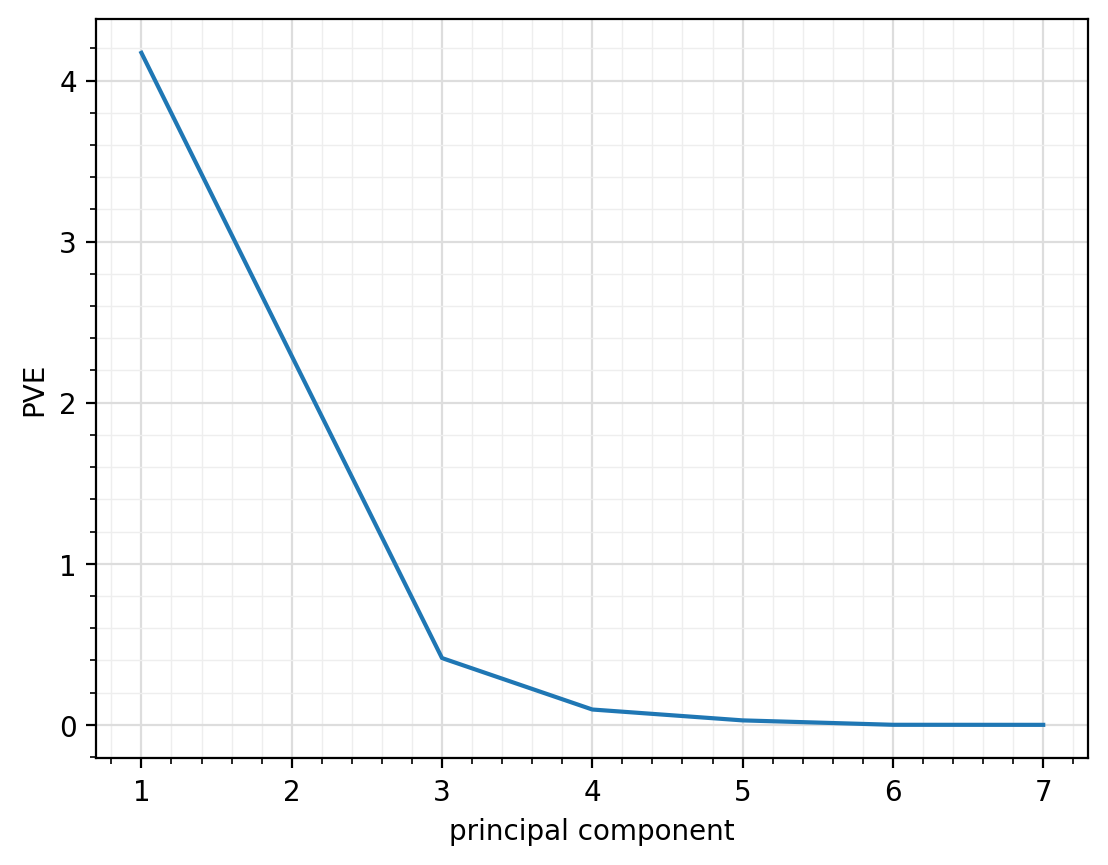

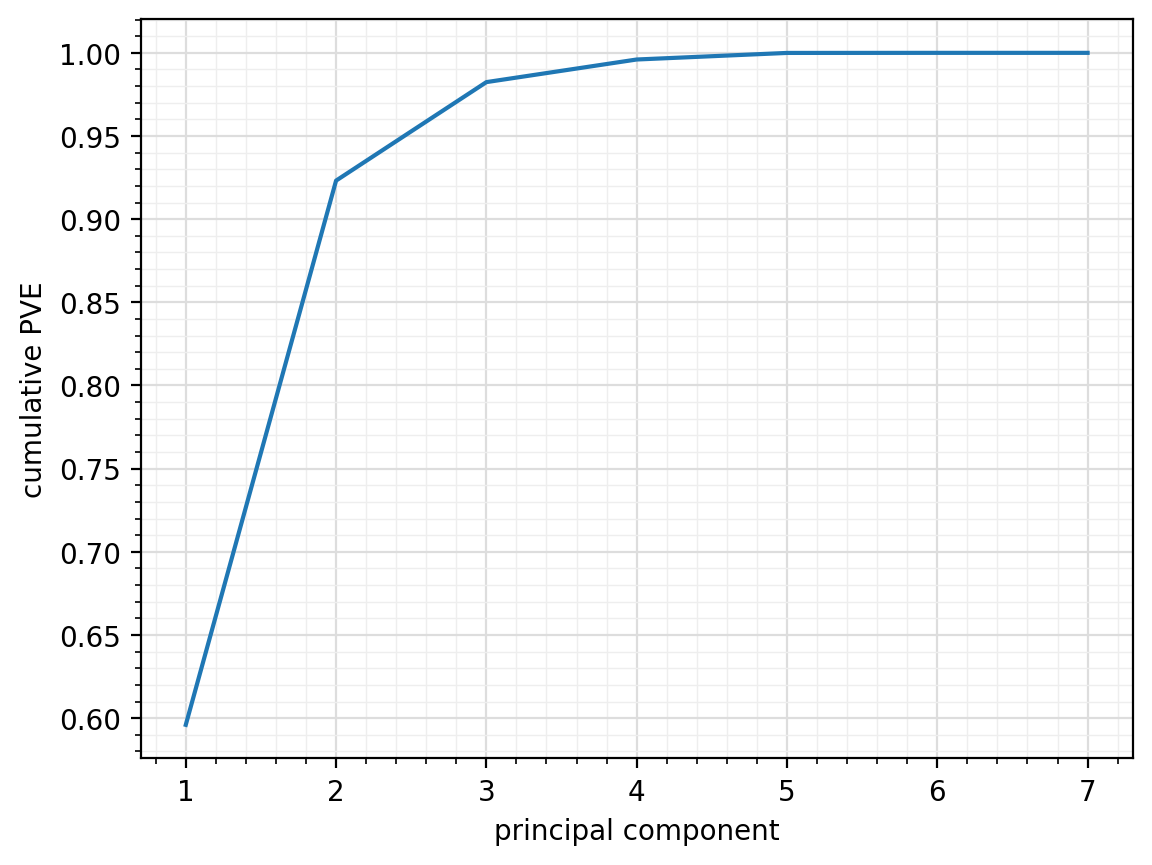

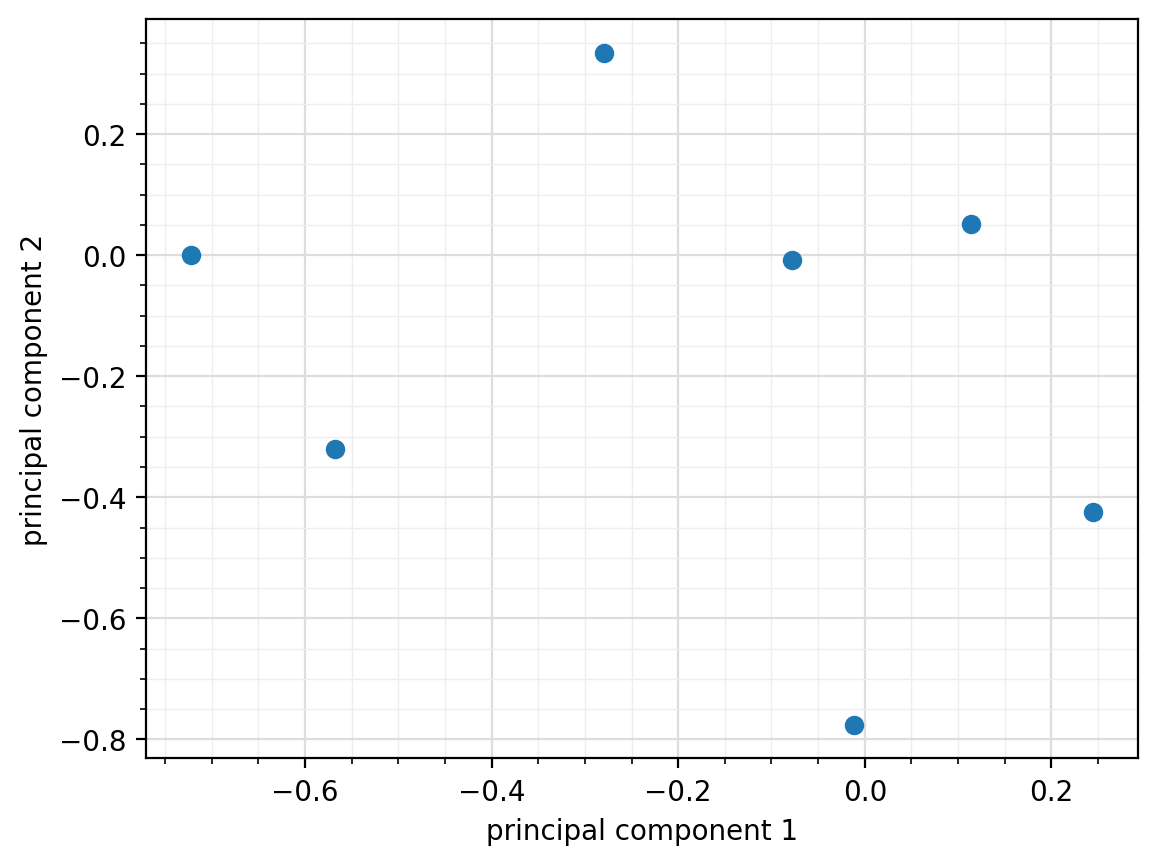

In [136]:
from sklearn import decomposition

df5 = pd.read_csv("hw1pizza.csv")
df5.drop(df5.columns[[0, 1]], axis=1, inplace=True)

normalized_df = (df5 - df5.mean()) / df5.std()
covariance_matrix = normalized_df.cov()

# the principal compoentns are the eigenvectors of the covariance matrix and the
# corresponding eigenvalues are the variances explained by the components
eigenvalues, eigenvectors = np.linalg.eig(np.array(covariance_matrix))

sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]

plt.plot(np.linspace(1, 7, 7), eigenvalues)
plt.xlabel("principal component")
plt.ylabel("PVE")
nice_grid(plt)

cum_pve = np.cumsum(eigenvalues) / sum(eigenvalues)
plt.figure()
plt.plot(np.linspace(1, 7, 7), cum_pve)
plt.xlabel("principal component")
plt.ylabel("cumulative PVE")
nice_grid(plt)

# check that things are the same as what you get from from sklearn.decomposition import PCA
# They're close but not identical
# pca = decomposition.PCA(n_components=7)
# fit = pca.fit(df5)
# plt.plot(np.linspace(1, 7, 7), np.cumsum(fit.explained_variance_ratio_))

plt.figure()
plt.scatter(sorted_eigenvectors[0], sorted_eigenvectors[1])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
nice_grid(plt)

df5
# df.drop(df.columns[[0, 4, 2]], axis=1, inplace=True)